## Single Model Evaluations in PROCESS

PROCESS is a systems code used to design and optimise fusion power plants. It brings together a wide range of physics and engineering models to represent the key components and constraints of a power plant.

At its core, PROCESS explores how different design choices affect overall performance. By varying input parameters, it determines whether a design is feasible and identifies solutions that satisfy both physics and engineering requirements.

PROCESS can run in two modes: solution and optimisation. Solution mode simply calls the models once to calculate the outputs. Optimisation mode does this repeatedly, while varying selected parameters to find an optimal solution.

In this notebook, we will start with a simplified example: evaluating a single model in isolation to illustrate how PROCESS works before moving on to more complex, integrated cases.

- First, we will run a single model, vary its inputs, and plot the responses.

- This will help us understand how the plasma physics responds to changes in key parameters.

### Separatrix Model

As an example, we will examine the power flow across the separatrix while varying the tungsten impurity fraction (tungsten density relative to electron density).

- Tungsten is commonly used for plasma-facing components such as the divertor and first wall, due to its high melting point, low sputtering yield, and low tritium retention.

- However, tungsten ions can be sputtered from these surfaces and enter the plasma after exposure to energetic ions and heat loads.

- Even small amounts of tungsten can radiate strongly and modify plasma performance.

By exploring this model, we can see how varying the tungsten fraction impacts the separatrix power and gain intuition for how plasma-facing materials influence overall power plant behaviour.

## Set up

First, we import PROCESS and this allows us to run it in the notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import process
from process.main import SingleRun

We can now inspect any variable to check its uninitialised value:

In [2]:
print(
    f"Power diverted to the separartrix (p_plasma_separatrix_mw) = {process.data_structure.physics_variables.p_plasma_separatrix_mw}"
)

Power diverted to the separartrix (p_plasma_separatrix_mw) = None


Now, we need to initialise all the variables in PROCESS with their values at a given design point to establish a baseline.
- We run an PROCESS in _evaluation_ mode to evaluate an input file, and output the values from all models.
- A generic tokamak input, called "large tomamak", is used here.

In [3]:
single_run = SingleRun("data/large_tokamak_eval_IN.DAT")
single_run.run()

The IN.DAT file does not contain any obsolete variables.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
 Version : 3.1.0
 Git Tag : v3.1.0-560-g92058a60
 Git Branch : demonstration-example
 Date : 02/09/2025 UTC
 Time : 10:16
 User : graeme
 Computer : oldstar
 Directory : /home/graeme/Projects/PROCESS/examples
 Input : /home/graeme/Projects/PROCESS/examples/data/large_tokamak_eval_IN.DAT
 Run title : generic large tokamak
 Run type : Reactor concept design: Pulsed tokamak model model, (c) UK Atomic Energy Authority
 
 **********************************************************************

/home/graeme/Projects/PROCESS/process/init.py:95: UserWarning: tmargmin_cs and tmargmin should not both be specified in IN.DAT tmargmin_cs has been ignored
  check_process(inputs)
/home/graeme/Projects/PROCESS/process/physics.py:7285: RuntimeWarning: divide by zero encountered in scalar divide
  * (neped / n_greenwald) ** -0.174
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
Ratio of central solenoid overall current density at beginning of flat-top / end of flat-top > 1 (|f_j_cs_start_end_flat_top| > 1)
/home/graeme/Projects/PROCESS/process/costs.py:3030: RuntimeWarning: invalid value encountered in sqrt
  annoam = cost_variables.ucoam[cost_variables.lsa - 1] * np.sqrt(
/home/graeme/Projects/PROCESS/process/costs.py:3101: RuntimeWarning: invalid value encountered in sqrt
  annwst = cost_variables.ucwst[cost_variables.lsa - 1] * np.sqrt(
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
dr_tf_plasma_case to small to accommodate the WP, 

 
 ************************************ PROCESS found a consistent solution *************************************
 
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
******************************************** Errors and Warnings *********************************************

 
 ******************************************* End of PROCESS

### Consistent Solution

The output above shows that PROCESS has found a consistent solution. This means the different physics and engineering models are in balance: the inputs, constraints, and outputs all line up without contradiction.
- Example: A consistent solution means that we don't extract more power from the plasma than is created by the plasma.

We can inspect some of the PROCESS outputs to investigate our solution.

In [4]:
# Kernel can crash when running physics without correctly initialised values
# Doesn't crash after running a once-through
# Print initial values of interest
def print_values():
    print(
        f"Tungsten Number Density (fimp(13)) = {process.data_structure.impurity_radiation_module.impurity_arr_frac[13]:.3e}"
    )
    print(
        f"Power radiated by the plasma (p_plasma_rad_mw) = {process.data_structure.physics_variables.p_plasma_rad_mw:.3e}"
    )
    print(
        f"Power across the separartrix (p_plasma_separatrix_mw) = {process.data_structure.physics_variables.p_plasma_separatrix_mw:.3e}"
    )


print_values()

Tungsten Number Density (fimp(13)) = 5.000e-06
Power radiated by the plasma (p_plasma_rad_mw) = 2.166e+02
Power across the separartrix (p_plasma_separatrix_mw) = 1.708e+02


Now, we will increase the tungsten number density and observe whether there is a change in the power across the separartrix.

In [5]:
process.data_structure.impurity_radiation_module.impurity_arr_frac[13] = 5.0e-5
single_run.models.physics.physics()
print_values()

Tungsten Number Density (fimp(13)) = 5.000e-05
Power radiated by the plasma (p_plasma_rad_mw) = 2.752e+02
Power across the separartrix (p_plasma_separatrix_mw) = 1.112e+02


With a higher tungsten number density, the radiation power increases, while the power incident on the divertor decreases. This illustrates how even small changes in impurity concentration can significantly affect plasma behaviour.

### Parameter Study: Tungsten Impurities

We will now explore the effect of varying the tungsten number density over a range of values. In particular, we will examine how this impacts:

- Radiation power

- Divertor power

- Constraint 15 (the L–H transition threshold)

By scanning across different tungsten fractions, we can build an understanding of how impurities influence both plasma performance and engineering constraints.

In [ ]:
from process.constraints import ConstraintManager


def run_impurities(w_imp_fracs):
    """Calculate responses to W impurities."""
    n = w_imp_fracs.shape[0]
    p_plasma_rad_mw = np.empty(n)
    p_plasma_separatrix_mw = np.empty(n)
    p_l_h_threshold_mw = np.empty(n)
    con15 = np.empty(n)

    # Loop over W impurity values, evaluate model and store responses at each point
    for i, imp_frac in enumerate(w_imp_fracs):
        # Set W number density, then run physics model
        process.data_structure.impurity_radiation_module.impurity_arr_frac[13] = (
            imp_frac
        )
        single_run.models.physics.physics()

        # Evaluate constraint equation 15 (L-H threshold constraint)
        con15_value = ConstraintManager.evaluate_constraint(15).normalised_residual

        # Need to copy values
        p_plasma_rad_mw[i] = (
            process.data_structure.physics_variables.p_plasma_rad_mw.item()
        )
        p_plasma_separatrix_mw[i] = (
            process.data_structure.physics_variables.p_plasma_separatrix_mw.item()
        )
        p_l_h_threshold_mw[i] = (
            process.data_structure.physics_variables.p_l_h_threshold_mw.item()
        )
        # Need to flip sign of constraint so negative means violated
        con15[i] = -con15_value

    return p_plasma_rad_mw, p_plasma_separatrix_mw, p_l_h_threshold_mw, con15

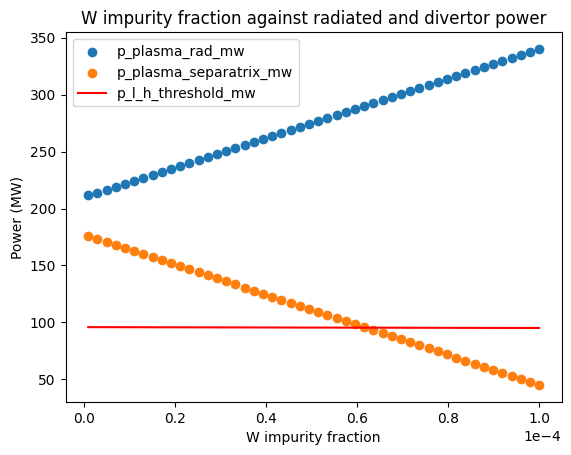

In [ ]:
%matplotlib inline
# Run W impurity parameter study
w_imp_fracs = np.linspace(1.0e-6, 1.0e-4, 50)
p_plasma_rad_mw, p_plasma_separatrix_mw, p_l_h_threshold_mw, con15 = run_impurities(
    w_imp_fracs
)
# Create a plot of the results.
fig, ax = plt.subplots()
ax.scatter(w_imp_fracs, p_plasma_rad_mw, label="p_plasma_rad_mw")
ax.scatter(w_imp_fracs, p_plasma_separatrix_mw, label="p_plasma_separatrix_mw")
ax.plot(w_imp_fracs, p_l_h_threshold_mw, "r", label="p_l_h_threshold_mw")
ax.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))
ax.set_title("W number density against radiated and divertor power")
ax.set_xlabel("W number density")
ax.set_ylabel("Power (MW)")
ax.legend()

The L-H mode power threshold (MW) which checks whether the power crossing the separatrix is at least as large as the L–H power threshold (times a safety factor). If not, the plasma would fall back into L-mode, and confinement would degrade.
- In other words, p_plasma_separartrix must be above the red line to satisfy the constraint.
- When the tungsten number density increased, power across the separatrix is lowered, and the constrain is violated.


When does the the L-H threshold constraint violation occur?

Text(0.0, -0.15, 'Violated')

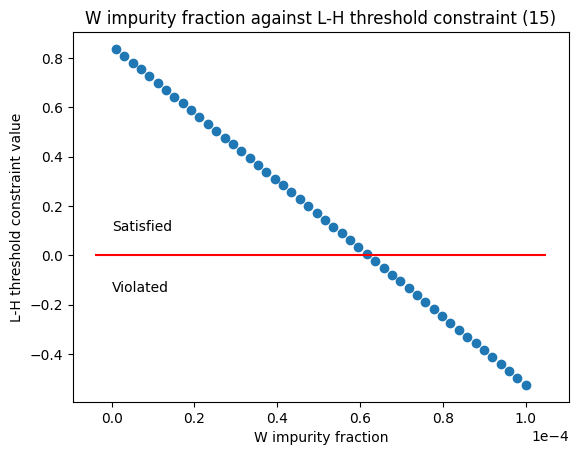

In [ ]:
%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(w_imp_fracs, con15, label="con15")
ax.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))
ax.set_title("W number density against L-H threshold constraint (15)")
ax.set_xlabel("W number density")
ax.set_ylabel("L-H threshold constraint value")
ax.hlines(0.0, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors="r")
ax.annotate("Satisfied", (0.0, 0.1))
ax.annotate("Violated", (0.0, -0.15))

The constraint becomes violated for W number desnity value is $> 6\times10^{-5}$.

This can easily be modified to investigate behaviour of any model in Process in isolation, without running other models or optimising.